### Step 1: Import Data with CoinPaprika API (https://api.coinpaprika.com/)

In [1]:
#from coinpaprika import client as Coinpaprika

#client = Coinpaprika.Client()

In [5]:
import Coinpaprika

api_client = Coinpaprika.Client()
market_overview = api_client.global_market_overview()

#print(market_overview)

all_coins = api_client.coins()
for i  in range(0, 1):
    print(all_coins[i]['id'])

btc-bitcoin


## get historical data 

In [6]:
from datetime import datetime, timedelta

coins = ['btc-bitcoin', 'eth-ethereum', 'bch-bitcoin-cash', 'bnb-binance-coin', 'xmc-monero-classic', 'ksm-kusama']
colors = ['green', 'red', 'blue', 'grey', 'black', 'yellow']

hists = []
for i in range(0, len(coins)):
    hist = api_client.coins.historical_OHLC(
        coin_id=coins[i],
        start=datetime.now() - timedelta(weeks=4),
        end=datetime.now()
    )
    # TODO: "clean up" data (na's, outliers, etc.)
    hists.append(hist)
    
allclosings = []
for i in range(0, len(hists)):
    closings = []
    for u in range(0, len(hists[i])):
        closings.append(hists[i][u]['high'])
        
    allclosings.append(closings)

In [32]:
from datetime import datetime, timedelta

coin = ['btc-bitcoin']
color = ['green']

hist = api_client.coins.historical_OHLC(
    coin_id=coin,
    start=datetime.now() - timedelta(weeks=4),
    end=datetime.now()
)
# TODO: "clean up" data (na's, outliers, etc.)

CoinpaprikaError: CoinpaprikaAPIException<status_code=404 message='404 page not found
' url='https://api.coinpaprika.com/v1/coins/['btc-bitcoin']/ohlcv/historical?start=1617348174&end=1619767374&limit=1&quotes=USD'>

In [29]:
alldata = []
for i in range(0,len(hist)):
    # 0: pdctPositive, 1: PDCT predicted difference closing tomorrow, 2: closing, 3: variance
    print(hist[i][0])
    variance = hist[i]['high'] - hist[i]['low']
    if(i == 0):
        pdct = hist[i]['closing']
    else:
        pdct = alldata[i]['closing'] - alldata[i-1]['closing']
        
    pdctPositive = pdct > 0
    alldata.append(pdctPositive, pdct, hist[i]['closing'], variance)

KeyError: 0

In [9]:
hists[0]

[{'time_open': datetime.datetime(2021, 4, 2, 0, 0),
  'time_close': datetime.datetime(2021, 4, 2, 23, 59, 59),
  'open': 58771.10234212,
  'high': 60086.03463254,
  'low': 58600.22488015,
  'close': 59035.72783202,
  'volume': 53148416451,
  'market_cap': 1097317485131},
 {'time_open': datetime.datetime(2021, 4, 3, 0, 0),
  'time_close': datetime.datetime(2021, 4, 3, 23, 59, 59),
  'open': 58940.44464841,
  'high': 59666.66386691,
  'low': 57144.00903996,
  'close': 57165.97146184,
  'volume': 52699595818,
  'market_cap': 1100531208299},
 {'time_open': datetime.datetime(2021, 4, 4, 0, 0),
  'time_close': datetime.datetime(2021, 4, 4, 23, 59, 59),
  'open': 57132.04533469,
  'high': 58478.53240678,
  'low': 56606.44484305,
  'close': 58159.06136439,
  'volume': 45169519363,
  'market_cap': 1066810971222},
 {'time_open': datetime.datetime(2021, 4, 5, 0, 0),
  'time_close': datetime.datetime(2021, 4, 5, 23, 59, 59),
  'open': 58180.21423583,
  'high': 60557.41667825,
  'low': 56890.093829

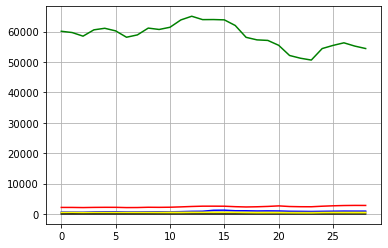

In [5]:
import matplotlib.pyplot as plt

for i in range(0, len(allclosings)):
    plt.plot(allclosings[i], colors[i])
plt.grid(True)
plt.show()

moving average golden cross ()

## Ziel: Klassifikation: Ist der nächste Tick (Tag) höher oder tiefer als heute
> Klassifikationstree

### Daten:
- Close heute
- Varianz heute (high - low)
- Moving Average (letztes Jahr)
- News Coverage (Google Trends) > pytrends

### Trainingsdatenset:
- von Paprikacoin API

In [ ]:
# CART
numberOfTestData = int(0.2 * len(alldata))

feature_cols = ['closing', 'variance']

X = alldata[feature_cols]               # Features
y = alldata['closing']                  # Target variable

X_train = X[:-numberOfTestData]
X_test  = X[-numberOfTestData:]
y_train = y[:-numberOfTestData]
y_test  = y[-numberOfTestData:]

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred).round(4))